In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [19]:
# gerekli kütüphaneler eklenir

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet121


from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [20]:
# resimleri yeniden boyutlandırıyoruz
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/sınıf/train'
valid_path = '/content/drive/MyDrive/sınıf/test'


In [29]:
from keras.applications import densenet
# Import the resnet50 library as shown below and add preprocessing layer to the front of resnet
# Here we will be using imagenet weights

densenet = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)





29097984/29084464 [==============================] - 0s 0us/step


In [30]:
# mevcut ağırlıkları eğitme
for layer in densenet.layers:
    layer.trainable = False

In [32]:
  # çıktı sınıflarının sayısını almak için 
folders = glob('/content/drive/MyDrive/sınıf/train/*')

In [33]:
# katmanlar_arttırılabilir_
x = Flatten()(densenet.output)

In [34]:
prediction = Dense(len(folders), activation='softmax')(x)

#model nesnesi oluşturduğumuzda
model = Model(inputs=densenet.input, outputs=prediction)

In [35]:

# modelin yapısı
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [36]:
# modelin hangi maliyet ve optimizasyon yönteminin kullanılacağı
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [37]:
# Görüntüleri veri kümesinden içe aktarmak için Görüntü Veri Üreticisini kullanılır
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [38]:
# Görüntü boyutu için başlatılanla aynı hedef boyutu sağladığınızdan emin olun
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/sınıf/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 39 images belonging to 2 classes.


In [39]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/sınıf/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 12 images belonging to 2 classes.


In [40]:
# # modele uygun Hücreyi çalıştıyoruz
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/5
2/2 [==============================] - 32s 11s/step - loss: 5.1827 - accuracy: 0.6154 - val_loss: 5.0463 - val_accuracy: 0.6667
Epoch 2/5
2/2 [==============================] - 1s 1s/step - loss: 3.2342 - accuracy: 0.6923 - val_loss: 2.2186 - val_accuracy: 0.6667
Epoch 3/5
2/2 [==============================] - 1s 381ms/step - loss: 1.8380 - accuracy: 0.6923 - val_loss: 2.5369 - val_accuracy: 0.5000
Epoch 4/5
2/2 [==============================] - 1s 1s/step - loss: 1.4099 - accuracy: 0.6410 - val_loss: 1.1863 - val_accuracy: 0.7500
Epoch 5/5
2/2 [==============================] - 1s 373ms/step - loss: 1.0937 - accuracy: 0.7179 - val_loss: 1.7221 - val_accuracy: 0.7500


In [41]:
import matplotlib.pyplot as plt

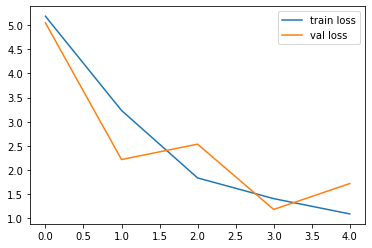

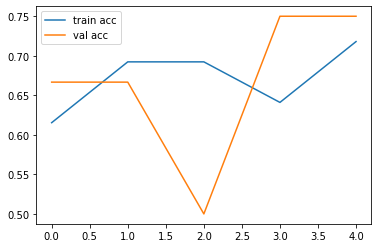

<Figure size 432x288 with 0 Axes>

In [42]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')